In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [ ]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

print("Dataset Shape:", X.shape)
print("\nFeature Names:", wine.feature_names)
print("\nTarget Classes:", wine.target_names)
print("\nFirst few rows:")
print(df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Dataset Shape: (178, 13)

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target Classes: ['class_0' 'class_1' 'class_2']

First few rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28          

In [ ]:
# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=wine.target_names))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# ========== DECISION TREE ==========
print("\n" + "="*50)
print("DECISION TREE MODEL")
print("="*50)

# Train decision tree model (no scaling needed)
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=wine.target_names))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))



Accuracy: 0.9814814814814815

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Confusion Matrix:
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]

DECISION TREE MODEL

Accuracy: 0.9629629629629629

Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      0.95      0.95        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54


Confusion Matrix:
[[18  1  0]
 [ 0 21  0]
 [ 1  0 13

In [ ]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Decision tree visualization saved as 'decision_tree.png'


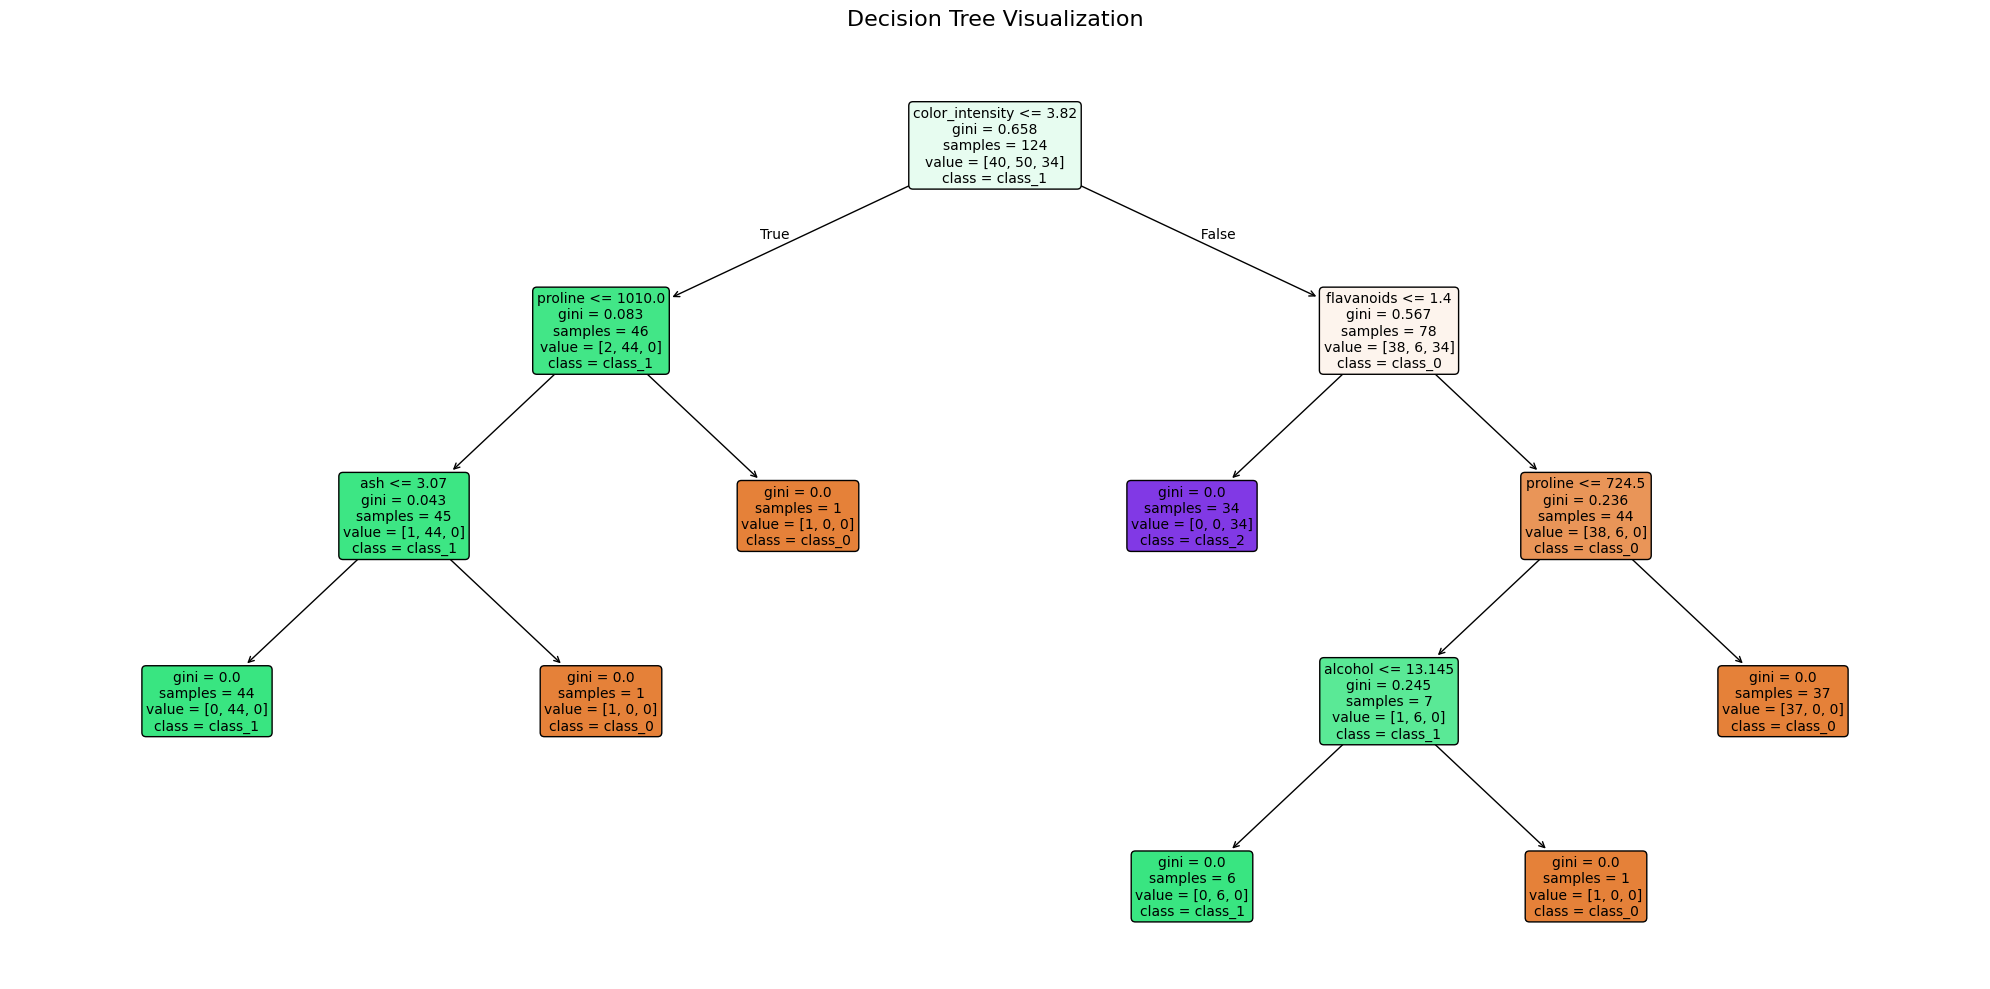

Model comparison saved as 'model_comparison.png'


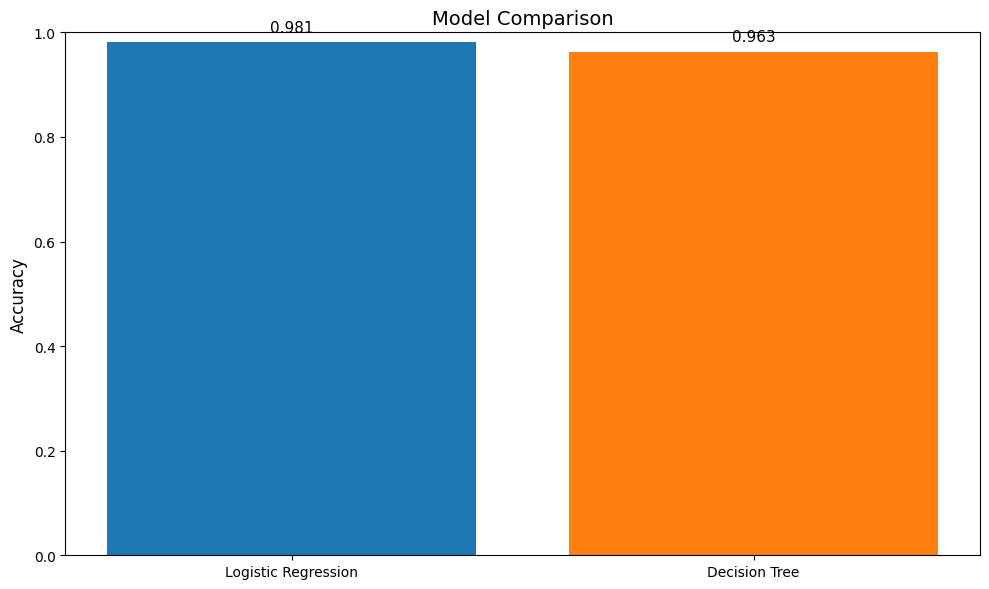


FEATURE IMPORTANCE (Decision Tree)
                         feature  importance
6                     flavanoids    0.414659
9                color_intensity    0.411475
12                       proline    0.128900
2                            ash    0.023961
0                        alcohol    0.021005
4                      magnesium    0.000000
3              alcalinity_of_ash    0.000000
1                     malic_acid    0.000000
5                  total_phenols    0.000000
8                proanthocyanins    0.000000
7           nonflavanoid_phenols    0.000000
10                           hue    0.000000
11  od280/od315_of_diluted_wines    0.000000

Feature importance plot saved as 'feature_importance.png'


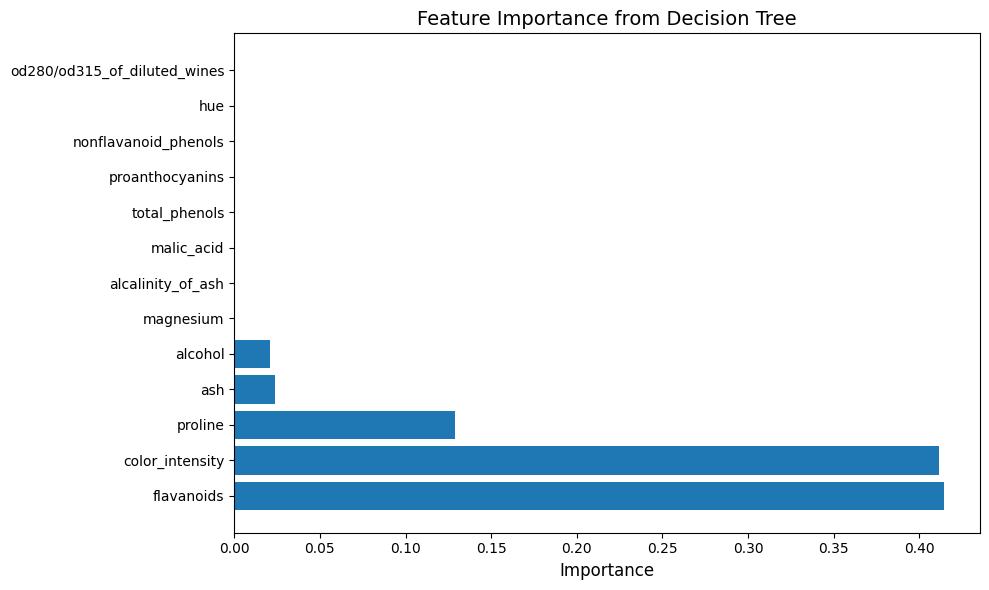

In [ ]:
#VISUALIZATIONS
# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=wine.feature_names,
          class_names=wine.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
print("\nDecision tree visualization saved as 'decision_tree.png'")
plt.show()

# Compare model accuracies
models = ['Logistic Regression', 'Decision Tree']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt)
]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Comparison', fontsize=14)
plt.ylim(0, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=11)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("Model comparison saved as 'model_comparison.png'")
plt.show()

# Feature importance from Decision Tree
feature_importance = pd.DataFrame({
    'feature': wine.feature_names,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*50)
print("FEATURE IMPORTANCE (Decision Tree)")
print("="*50)
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importance from Decision Tree', fontsize=14)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("\nFeature importance plot saved as 'feature_importance.png'")
plt.show()